In [1]:
from SLP_implementation import CustomPerceptron as slp
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
import operations
import ast
from scipy.interpolate import make_interp_spline
from scipy.fft import fft,ifft
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('penguins.csv')
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,Adelie,39.1,18.7,181,male,3750
1,Adelie,39.5,17.4,186,female,3800
2,Adelie,40.3,18.0,195,female,3250
3,Adelie,39.6,17.7,186,female,3500
4,Adelie,36.7,19.3,193,female,3450


In [3]:
np.sum(df.duplicated())

0

In [4]:
df.dtypes


species               object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
gender                object
body_mass_g            int64
dtype: object

In [5]:
np.sum(df.isna())

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               6
body_mass_g          0
dtype: int64

In [6]:
df['gender'] = df['gender'].fillna(0)
np.sum(df.isna())

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
gender               0
body_mass_g          0
dtype: int64

In [7]:
df.species.value_counts()

Chinstrap    50
Adelie       50
Gentoo       50
Name: species, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
species_enc = LabelEncoder()
df['species'] = species_enc.fit_transform( df[['species']] )
print(df['species'])

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int32


In [9]:
df['gender'] = [1 if kind == 'male' else 0 for kind in df['gender']]
print(df['gender'])

0      1
1      0
2      0
3      0
4      0
      ..
145    1
146    0
147    1
148    1
149    0
Name: gender, Length: 150, dtype: int64


In [10]:
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,gender,body_mass_g
0,0,39.1,18.7,181,1,3750
1,0,39.5,17.4,186,0,3800
2,0,40.3,18.0,195,0,3250
3,0,39.6,17.7,186,0,3500
4,0,36.7,19.3,193,0,3450


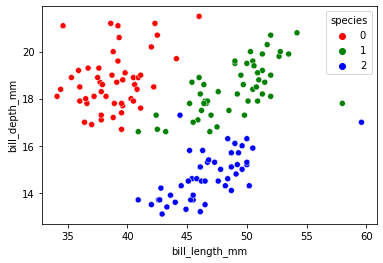

In [11]:
operations.visualization('bill_length_mm','bill_depth_mm',df)

Plotting X1,X3 :

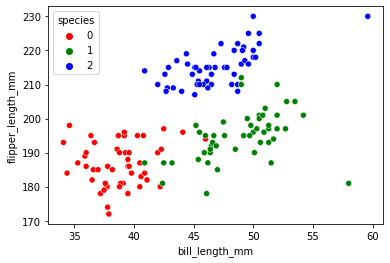

In [12]:
operations.visualization('bill_length_mm','flipper_length_mm',df)


Plotting X4 :

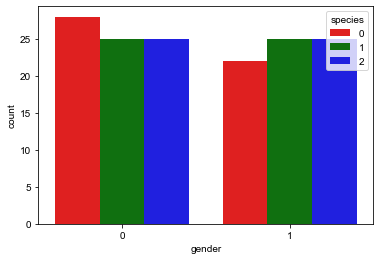

In [13]:
sns.countplot(x= 'gender', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
sns.set_style("darkgrid")
plt.show()

Plotting X1,X5 :

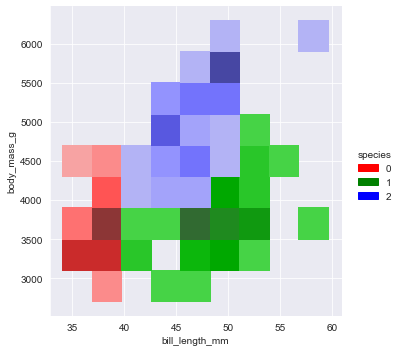

In [14]:
sns.displot(x= 'bill_length_mm',y='body_mass_g' ,data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
sns.set_style("darkgrid")
plt.show()

Plotting X2,X3 :

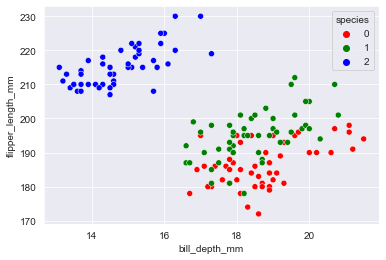

In [15]:
operations.visualization('bill_depth_mm','flipper_length_mm',df)


Plotting X2,X5 :

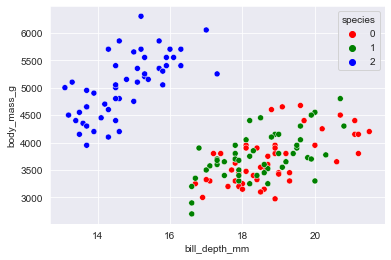

In [16]:
operations.visualization('bill_depth_mm','body_mass_g',df)

Plotting X3,X5 :

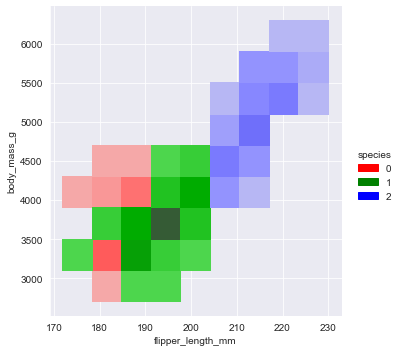

In [17]:
sns.displot(x= 'flipper_length_mm', y= 'body_mass_g', data= df, hue='species'
                , palette= {0:'red',1:'green', 2:'blue'})
plt.show()

### conclusion :
#### ......."X1 and X2 are the best features to split on linearly "....

### Dividing the dataframe into 3 separate classes

In [18]:
df_Adelie = df[df['species'] == 0]
df_Gentoo = df[df['species'] == 1]
df_Chinstrap = df[df['species'] == 2]

In [19]:
df_Adelie_Gentoo = operations.append_DF(df_Adelie, df_Gentoo)
df_Adelie_Gentoo

,bill_depth_mm,bill_length_mm,body_mass_g,flipper_length_mm,gender,species
0,18.7,39.1,3750,181,1,0
1,17.4,39.5,3800,186,0,0
2,18.0,40.3,3250,195,0,0
3,17.7,39.6,3500,186,0,0
4,19.3,36.7,3450,193,0,0
...,...,...,...,...,...,...
95,18.5,50.8,4450,201,1,1
96,17.9,50.1,3400,190,0,1
97,19.6,49.0,4300,212,1,1
98,18.7,51.5,3250,187,1,1


In [20]:
x = df_Adelie_Gentoo.iloc[:,1]
x = x.to_numpy()
xtrain = x[:30]
xtest = x[30:50]
xall = np.append(xtest,xtrain)
print(xall)

[39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8 36.  44.1
 37.  39.6 41.1 37.5 36.  42.3 39.1 39.5 40.3 39.6 36.7 39.3 38.9 39.2
 34.1 42.  37.8 37.8 41.1 38.6 34.6 36.6 38.7 42.5 34.4 46.  37.8 37.7
 35.9 38.2 38.8 35.3 40.6 40.5 37.9 40.5]


In [21]:
df_train,df_test = operations.split_features(df_Adelie_Gentoo,0,1,5)

In [12]:
from sklearn.model_selection import train_test_split
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.4, shuffle=False, random_state=8)

In [24]:
prcptrn = slp(n_iterations=100)

In [25]:
prcptrn.fit(XTrain, YTrain)

IndexError: tuple index out of range

In [15]:
prcptrn.score(XTest, YTest), prcptrn.score(XTrain, YTrain)

(0.5333333333333333, 0.5619047619047619)

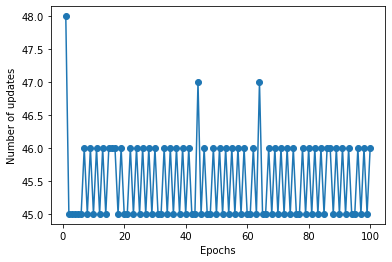

In [16]:
plt.plot(range(1, len(prcptrn.errors_) + 1), prcptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [35]:
print(XTrain.size)
print(XTest.size)

print(YTrain.size)
print(YTest.size)

60
40
30
20


In [30]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(XTrain, YTrain)

y_pred = ppn.predict(XTest)

print('Accuracy: %.3f' % accuracy_score(YTest, y_pred))
print('Accuracy: %.3f' % ppn.score(XTest, YTest))

ValueError: Expected 2D array, got 1D array instead:
array=[18.7 17.4 18.  17.7 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2
 21.1 17.8 19.  20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9
 18.6 18.9 39.1 39.5 40.3 39.6 36.7 39.3 38.9 39.2 34.1 42.  37.8 37.8
 41.1 38.6 34.6 36.6 38.7 42.5 34.4 46.  37.8 37.7 35.9 38.2 38.8 35.3
 40.6 40.5 37.9 40.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.